In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv(r"C:\Study\All Projects\Python Project\amazon.csv", encoding='ISO-8859-1')

In [36]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [37]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [38]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [40]:
df.shape

(6454, 5)

# Check and delete duplicates

In [41]:
df.duplicated().any()

True

In [42]:
df=df.drop_duplicates()

In [43]:
df.duplicated().any()

False

# Check null

In [45]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

No null found

# Month on which max number of forest fires reported

In [46]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [72]:
data=df.groupby('month')['number'].sum().sort_values(ascending=False).reset_index()

data


,month,number
0,Julho,92319.113
1,Outubro,88681.579
2,Agosto,88050.435
3,Novembro,85508.054
4,Setembro,58578.305
5,Dezembro,57535.480
6,Junho,55997.675
7,Janeiro,47681.844
8,Maio,34725.363
9,Fevereiro,30839.050


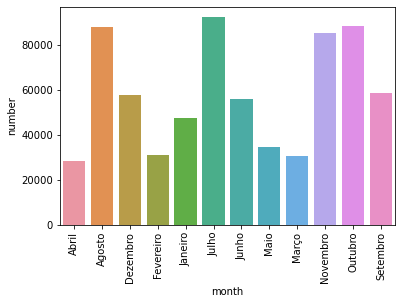

In [68]:
sns.barplot(x="month",y="number",data=data)
plt.xticks(rotation=90)
plt.show()

July has the highest forest fires reported

# In which year maximum forest fires were reported

In [78]:
df.groupby('year')['number'].sum().sort_values(ascending=False).reset_index()

,year,number
0,2003,42760.674
1,2016,42212.229
2,2015,41208.292
3,2012,40084.860
4,2014,39621.183
5,2009,39116.178
6,2004,38450.163
7,2002,37390.600
8,2010,37037.449
9,2017,36619.624


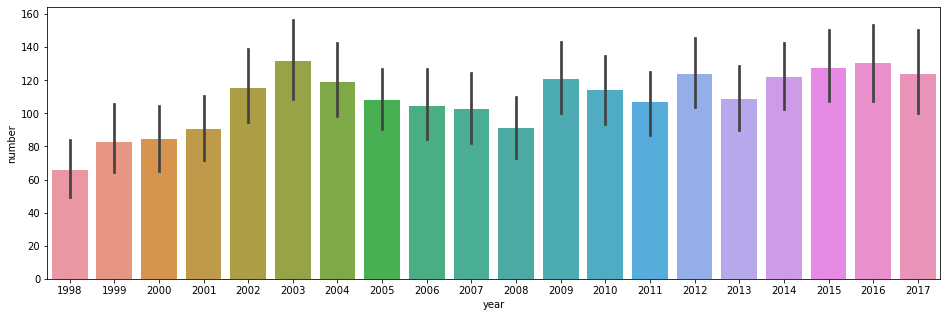

In [84]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=df)
plt.show()

2003 was the year where there were more forest fires

# In which state there were max forest fires reported

In [86]:
df.groupby("state")["number"].sum().sort_values(ascending=False).reset_index()

,state,number
0,Mato Grosso,96246.028
1,Paraiba,52426.918
2,Sao Paulo,51121.198
3,Rio,45094.865
4,Bahia,44746.226
5,Piau,37803.747
6,Goias,37695.520
7,Minas Gerais,37475.258
8,Tocantins,33707.885
9,Amazonas,30650.129


In Mato Grosso state max fire were reported

# Find the Number of fires reported in Amazonas

In [96]:
df[df['state']=='Amazonas']['number'].sum()

30650.129

# Find the number of forest fires in amazonas yearwise

In [116]:
data1=df[df['state']=='Amazonas']

In [120]:
data1.groupby("year")['number'].sum().sort_values(ascending=False).reset_index()

,year,number
0,2002,2852.000
1,2008,2717.000
2,2014,2385.909
3,2010,2324.508
4,2004,2298.207
5,2016,2060.972
6,2005,1657.128
7,2011,1652.538
8,2003,1524.268
9,2009,1320.601


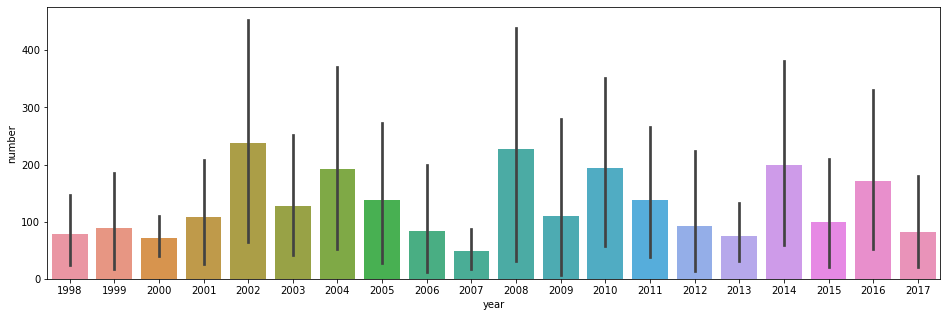

In [122]:
plt.figure(figsize=(16,5))
sns.barplot(x="year",y="number",data=data1)
plt.show()

# Find the number of forest fires in amazonas Daywise

In [124]:
data2=df[df['state']=="Amazonas"]

In [126]:
data2.groupby(data2['date']).sum()

,year,number
date,,
1998-01-01,23976,946.000
1999-01-01,23988,1061.000
2000-01-01,24000,853.000
2001-01-01,24012,1297.000
2002-01-01,24024,2852.000
2003-01-01,24036,1524.268
2004-01-01,24048,2298.207
2005-01-01,24060,1657.128
2006-01-01,24072,997.640


# Find total number of fires were reported in 2015 and visualize data based on each month

In [16]:
df[df['year']==2015].groupby('month')['number'].sum().sort_values(ascending=False).reset_index()

,month,number
0,Julho,92326.113
1,Outubro,88681.579
2,Agosto,88050.435
3,Novembro,85508.054
4,Setembro,58578.305
5,Dezembro,57535.480
6,Junho,56010.675
7,Janeiro,47747.844
8,Maio,34731.363
9,Fevereiro,30848.050


<AxesSubplot:xlabel='month', ylabel='number'>

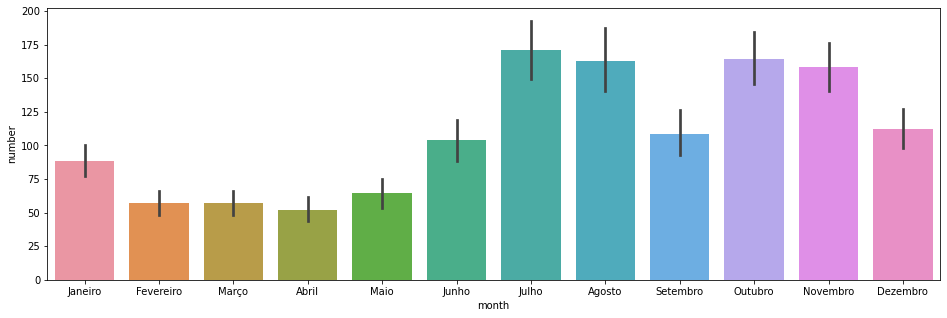

In [19]:
plt.figure(figsize=(16,5))
sns.barplot(x="month",y="number",data=df)

# Find the average number of fires were reported from highest to lowest

In [21]:
df.groupby("state")['number'].mean().sort_values(ascending=False).reset_index()

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,201.351523
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,109.698573


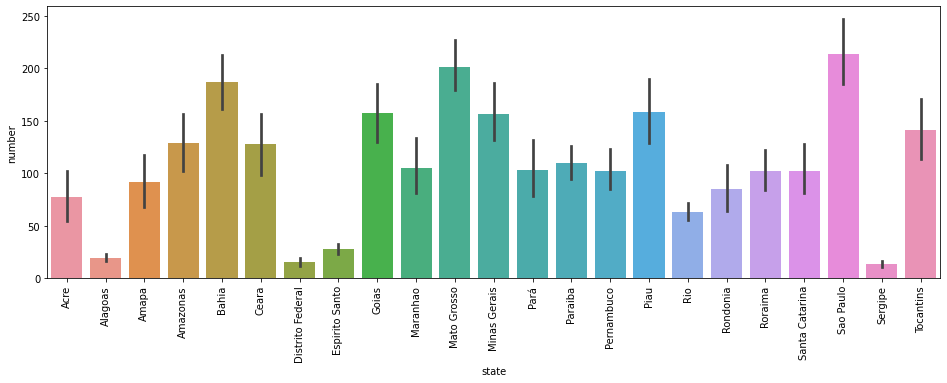

In [26]:
plt.figure(figsize=(16,5))
sns.barplot(x="state",y="number",data=df)
plt.xticks(rotation=90)
plt.show()

# To find the state names where fires were reported in december month

In [39]:
df[df['month']=='Dezembro']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

Following are the states 